## Algorithm

In [5]:
# import pandas as pd
# import datetime as dt
# import math

# # Load the data
# file_path = '../data/Cleaned_ISC_Data.csv'
# data = pd.read_csv(file_path)

# # Convert DATE to datetime and extract year, month, day
# data['DATE'] = pd.to_datetime(data['DATE'], format='%d-%m-%Y')
# data['yyyy'] = data['DATE'].dt.year
# data['mm'] = data['DATE'].dt.month
# data['dd'] = data['DATE'].dt.day

# # Initialize the necessary variables
# n = len(data)
# data_copy = data.copy()  # Copy of data for future use
# date = []

# # Create a date list from the data
# for i in range(n):
#     date_i = dt.date(data.yyyy[i], data.mm[i], data.dd[i])
#     date.append(date_i)

# # Create a DataFrame with the necessary columns and sort it by date
# data = pd.DataFrame({
#     'date': date,
#     'lat': data.LAT,
#     'lon': data.LON,
#     'depth': data.DEPTH,
#     'mag': data.MAG,
#     'magType': data.TYPE
# })
# data = data.sort_values(by='date', ascending=True)

# # Declustering process
# for i in range(n):
#     try:
#         for j in range(i + 1, n):
#             try:
#                 tdiff = data.date[j] - data.date[i]
#                 T = tdiff.days

#                 # Distance calculation between two coordinates using 'Spherical Law of Cosines'
#                 x1 = data.lat[i] * math.pi / 180
#                 x2 = data.lat[j] * math.pi / 180
#                 y1 = data.lon[i] * math.pi / 180
#                 y2 = data.lon[j] * math.pi / 180
#                 L = math.acos(math.sin(x1) * math.sin(x2) + math.cos(x1) * math.cos(x2) * math.cos(y2 - y1)) * 6371

#                 l = 10 ** (0.1238 * data.mag[j] + 0.983)
#                 if data.mag[j] >= 6.5:
#                     t = 10 ** (0.032 * data.mag[j] + 2.7389)
#                 else:
#                     t = 10 ** (0.5409 * data.mag[j] - 0.547)

#                 if L <= l and T <= t:  # Aftershock Removal
#                     if data.mag[i] > data.mag[j]:
#                         data = data.drop(index=j)
#                     else:  # Foreshock Removal
#                         data = data.drop(index=i)
#                         i = j
#                         break
#             except:
#                 pass
#     except:
#         pass

# data = data.reset_index(drop=True)

# # Prepare the final DataFrame
# yyyy = []
# mm = []
# dd = []

# for i in range(len(data)):
#     yyyy_i = data.date[i].year
#     mm_i = data.date[i].month
#     dd_i = data.date[i].day

#     yyyy.append(yyyy_i)
#     mm.append(mm_i)
#     dd.append(dd_i)

# datas = pd.DataFrame({
#     'yyyy': yyyy,
#     'mm': mm,
#     'dd': dd,
#     'latitude': data.lat,
#     'longitude': data.lon,
#     'depth': data.depth,
#     'mag': data.mag,
#     'magType': data.magType
# })

# # Save the declustered DataFrame to a new CSV file
# output_file_path = '../data/mainshock_only.csv'
# datas.to_csv(output_file_path, index=False)

# print(f"Declustered data saved to {output_file_path}")

In [6]:
# file_path = '../data/mainshock_only.csv'
# earthquake_data = pd.read_csv(file_path)
# earthquake_data.head()

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Load the datasets
cleaned_file_path = '../data/Cleaned_ISC_Data.csv'
declustered_file_path = '../data/mainshock_only.csv'

cleaned_data = pd.read_csv(cleaned_file_path)
declustered_data = pd.read_csv(declustered_file_path)

In [8]:
print(len(cleaned_data))
print(len(declustered_data))

8040
5484


/Users/zuhair/anaconda3/lib/python3.11/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)


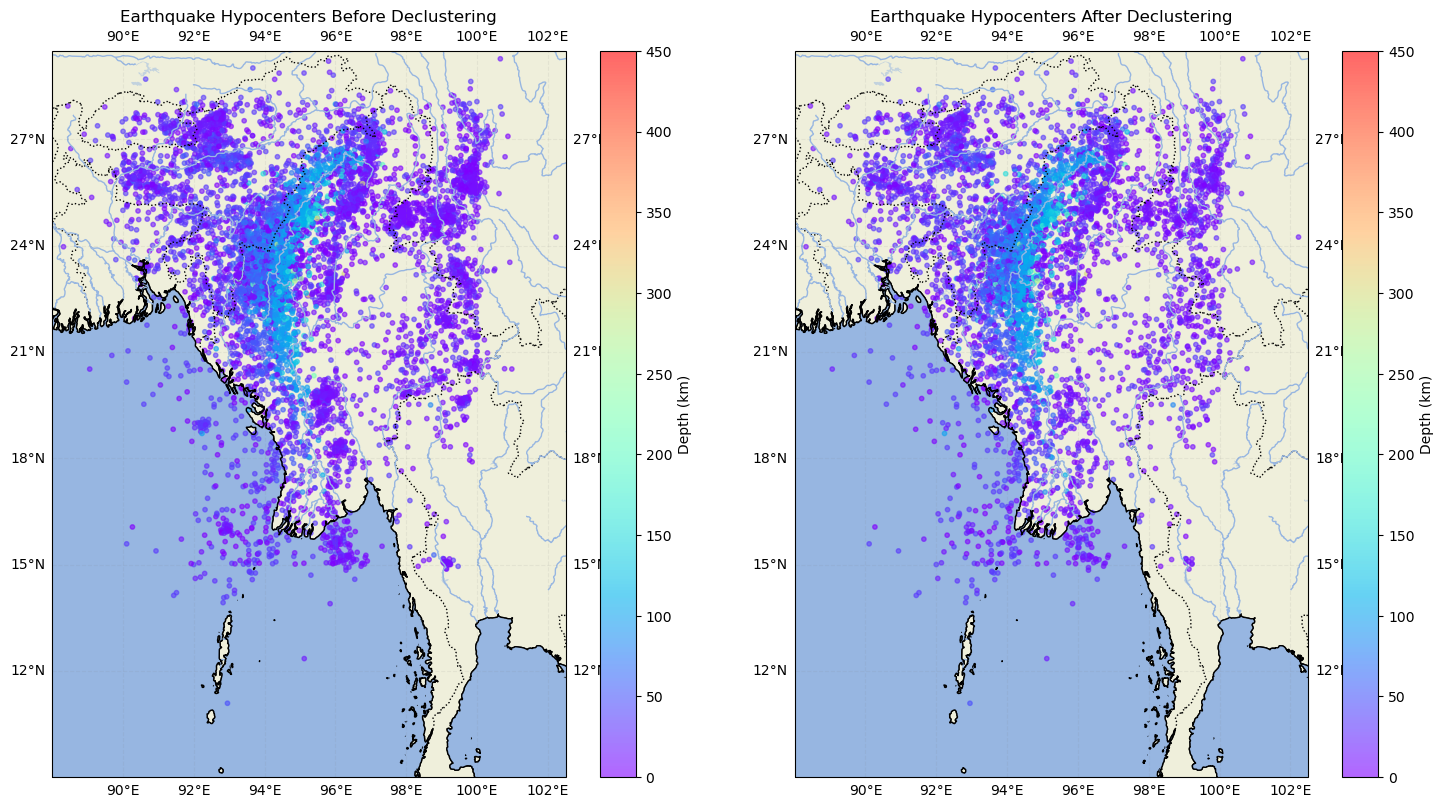

In [9]:
# Ensure uniform column names
uniform_columns = {
    'LAT': 'latitude',
    'LON': 'longitude',
    'DEPTH': 'depth',
    'MAG': 'magnitude',
    'DATE': 'date'
}
cleaned_data.rename(columns=uniform_columns, inplace=True)
declustered_data.rename(columns=uniform_columns, inplace=True)

# Define the Myanmar region bounding box (adjust as needed)
min_lat, max_lat = 9.0, 29.5
min_lon, max_lon = 88.0, 102.5

# Function to plot earthquakes on a map
def plot_earthquakes(data, title, ax):
    ax.set_extent([min_lon, max_lon, min_lat, max_lat])
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    ax.add_feature(cfeature.LAND, edgecolor='black')
    ax.add_feature(cfeature.OCEAN)
    ax.add_feature(cfeature.RIVERS)
    ax.add_feature(cfeature.LAKES, alpha=0.5)
    
# Add gridlines with labels
    ax.gridlines(draw_labels=True, color='gray', alpha=0.1, linestyle='--')
    ax.top_labels = False
    ax.right_labels = False
    ax.xlabel_style = {'size': 12, 'color': 'black', 'rotation': 90}
    ax.ylabel_style = {'size': 12, 'color': 'black'}

    scatter = ax.scatter(data['longitude'], data['latitude'], c=data['depth'], cmap='rainbow', s=10, alpha=0.6, transform=ccrs.PlateCarree())
    plt.colorbar(scatter, ax=ax, orientation='vertical', label='Depth (km)')
    ax.set_title(title)

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 8), subplot_kw={'projection': ccrs.PlateCarree()})

# Plot before declustering
plot_earthquakes(cleaned_data, 'Earthquake Hypocenters Before Declustering', ax1)

# Plot after declustering
plot_earthquakes(declustered_data, 'Earthquake Hypocenters After Declustering', ax2)

plt.tight_layout()
plt.show()
